In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [30]:
import pandas as pd

file_path = '/content/drive/MyDrive/[23-2] GCP/fulldata_07_24_04_P_일반음식점.csv'  # CSV 파일 경로
df = pd.read_csv(file_path,  encoding='cp949')
print(df.head())

<ipython-input-30-0619cc007be7>:4: DtypeWarning: Columns (11,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,  encoding='cp949')


   번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호       인허가일자  \
0   1  일반음식점  07_24_04_P   3930000  5560000-101-2023-00271  2023-09-22   
1   2  일반음식점  07_24_04_P   4710000  4710000-101-2023-00096  2023-09-22   
2   3  일반음식점  07_24_04_P   3740000  3770000-101-2023-00341  2023-09-22   
3   4  일반음식점  07_24_04_P   3740000  3770000-101-2023-00339  2023-09-22   
4   5  일반음식점  07_24_04_P   4221000  4221000-101-2023-00058  2023-09-22   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장생산직직원수 건물소유구분명  보증액  월세액  \
0      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
1      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
2      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
3      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
4      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   

   다중이용업소여부 시설총규모  전통업소지정번호 전통업소주된음식 홈페이지 Unnamed: 47  
0         N   0.0       NaN      NaN  NaN         NaN  
1         

In [31]:
file_path = '/content/drive/MyDrive/[23-2] GCP/fulldata_07_24_05_P_휴게음식점.csv'  # CSV 파일 경로
df_1 = pd.read_csv(file_path,  encoding='cp949')
print(df_1.head())

<ipython-input-31-770b8f7cd0f7>:2: DtypeWarning: Columns (11,39,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(file_path,  encoding='cp949')


   번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호       인허가일자  \
0   1  휴게음식점  07_24_05_P   3670000  3670000-104-2023-00335  2023-09-22   
1   2  휴게음식점  07_24_05_P   3140000  3140000-104-2023-00222  2023-09-22   
2   3  휴게음식점  07_24_05_P   3140000  3140000-104-2023-00221  2023-09-22   
3   4  휴게음식점  07_24_05_P   4070000  4070000-104-2023-00180  2023-09-22   
4   5  휴게음식점  07_24_05_P   3070000  3070000-104-2023-00181  2023-09-22   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장생산직직원수 건물소유구분명  보증액  월세액  \
0      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
1      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
2      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
3      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
4      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   

   다중이용업소여부 시설총규모  전통업소지정번호 전통업소주된음식 홈페이지 Unnamed: 47  
0         N   0.0       NaN      NaN  NaN         NaN  
1         

# 트렌디 데이터 분석

In [5]:
bbger_df = df[df['사업장명'].str.contains('밥버거', na=False)]

In [8]:
bbger_df_1 = df_1[df_1['사업장명'].str.contains('밥버거', na=False)]

In [10]:
merged_bbger_df = pd.concat([bbger_df, bbger_df_1], axis=0)

In [12]:
merged_bbger_df.to_csv('merged_bbger_df.csv', index = False)

In [3]:
import pandas as pd

file_path = '/content/merged_bbger_df.csv'  # CSV 파일 경로
merged_bbger_df = pd.read_csv(file_path)

In [4]:
merged_bbger_df['인허가일자']

0       2023-09-27
1       2021-02-01
2       2015-08-04
3       2014-07-30
4       2014-08-26
           ...    
1483    2015-02-11
1484    2014-09-11
1485    2014-08-12
1486    2013-12-23
1487    2018-02-07
Name: 인허가일자, Length: 1488, dtype: object

In [5]:
merged_bbger_df['인허가일자'] = pd.to_datetime(merged_bbger_df['인허가일자'])
merged_bbger_df['년월'] = merged_bbger_df['인허가일자'].dt.to_period('M')
counts = merged_bbger_df['년월'].value_counts().sort_index()

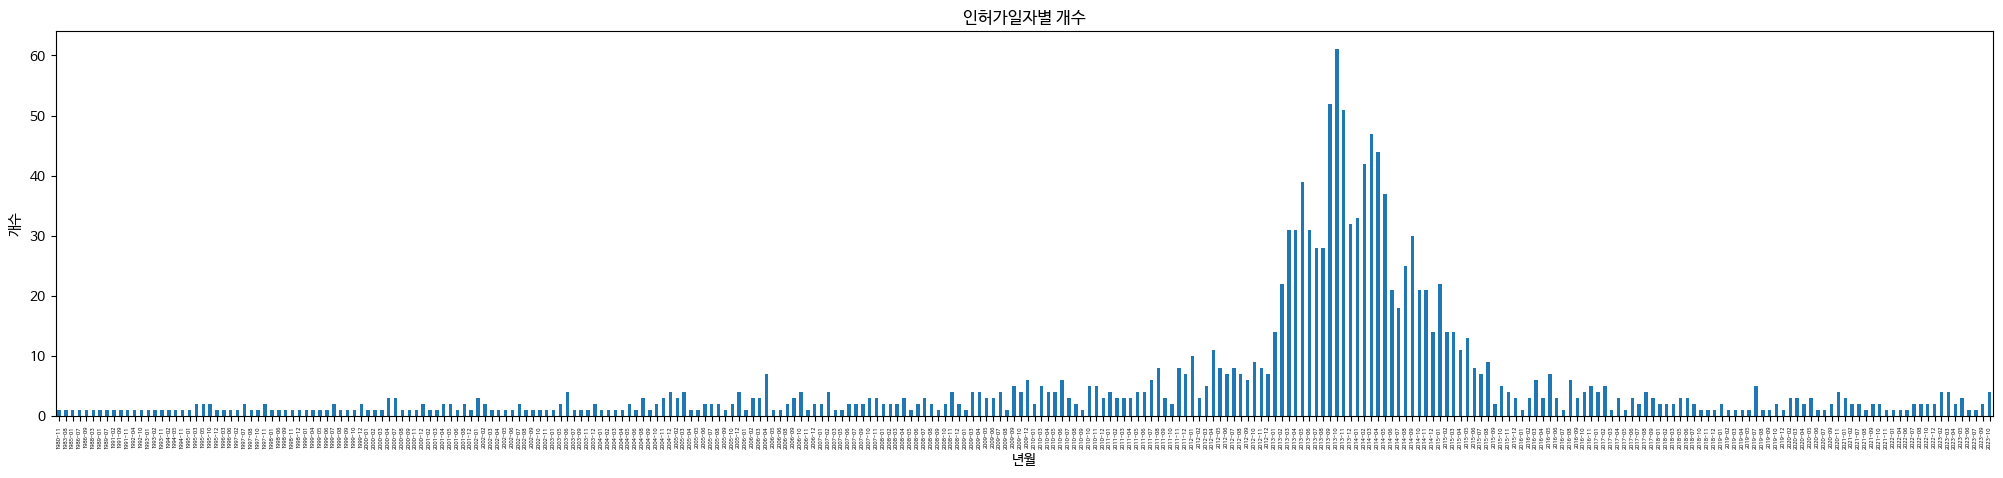

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(25, 5))
counts.plot(kind='bar')
plt.title('인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=4)
plt.show()

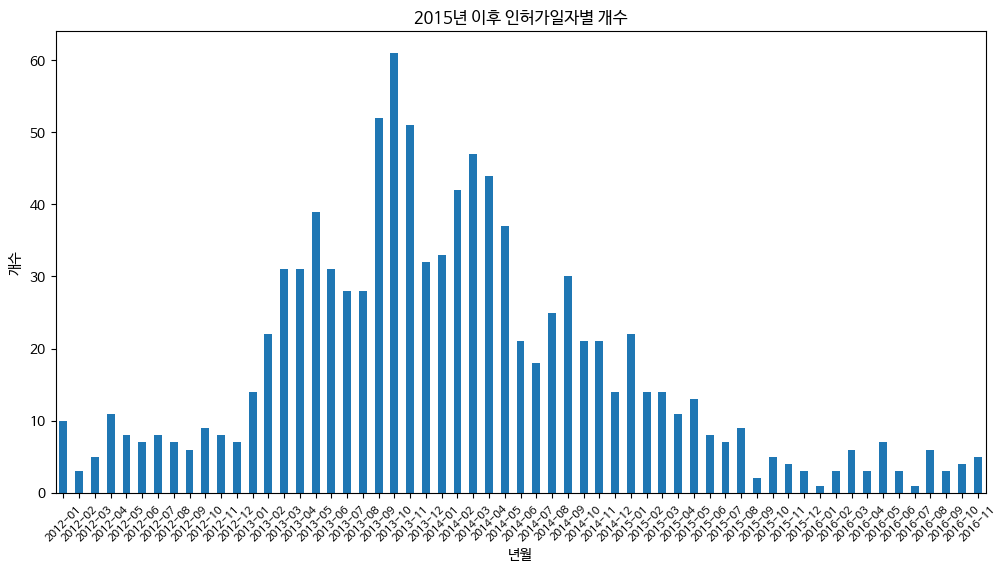

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
merged_bbger_df['인허가일자'] = pd.to_datetime(merged_bbger_df['인허가일자'])
merged_bbger_df['년월'] = merged_bbger_df['인허가일자'].dt.to_period('M')

# 2012~2016년 데이터만 필터링
filtered_df = merged_bbger_df[(merged_bbger_df['인허가일자'].dt.year >= 2012) & (merged_bbger_df['인허가일자'].dt.year <= 2016)]

# '년월'별로 개수 세기
counts = filtered_df['년월'].value_counts().sort_index()

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('2015년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [19]:
file_path = '/content/drive/MyDrive/[23-2] GCP/밥버거_ggtrend.csv'  # CSV 파일 경로
trend_bbger = pd.read_csv(file_path, encoding='cp949')

In [20]:
trend_bbger.columns

Index(['월', '밥버거'], dtype='object')

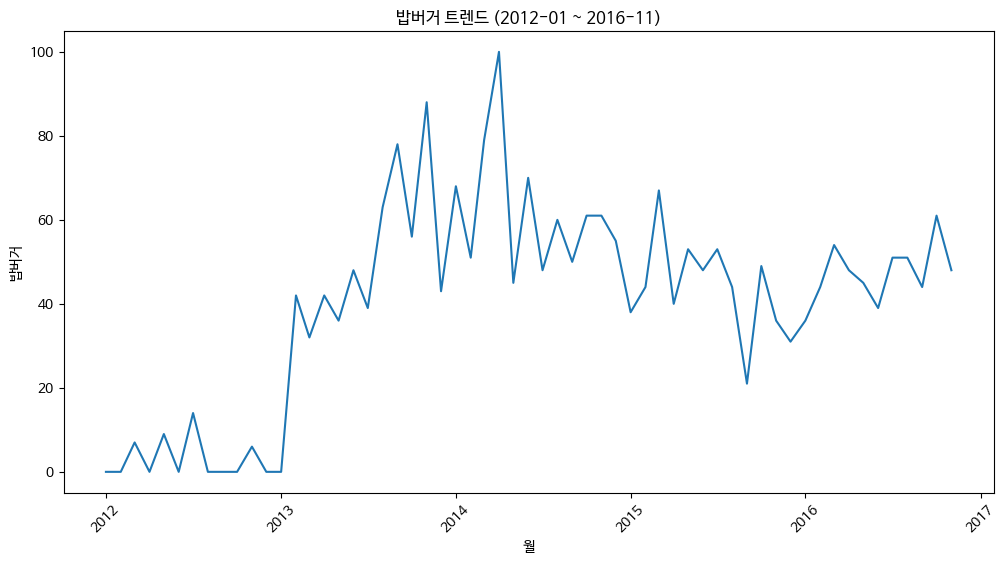

In [26]:
# '월' 컬럼을 datetime 형식으로 변환
trend_bbger['월'] = pd.to_datetime(trend_bbger['월'], format='%b-%y')

# 2012-01부터 2016-11까지 데이터 필터링
start_date = pd.to_datetime('2012-01')
end_date = pd.to_datetime('2016-11')
filtered_trend_bbger = trend_bbger[(trend_bbger['월'] >= start_date) & (trend_bbger['월'] <= end_date)]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(filtered_trend_bbger['월'], filtered_trend_bbger['밥버거'])
plt.title('밥버거 트렌드 (2012-01 ~ 2016-11)')
plt.xlabel('월')
plt.ylabel('밥버거')
plt.xticks(rotation=45)
plt.show()

## 인허가일자 및 밥버거 트렌드

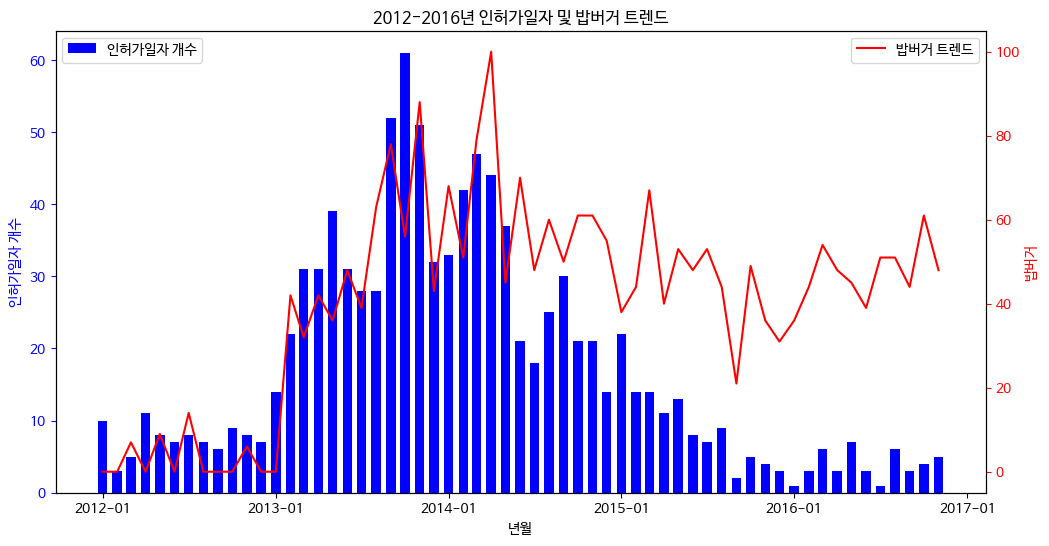

In [29]:
import matplotlib.dates as mdates

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_bbger['월'], filtered_trend_bbger['밥버거'], color='r', label='밥버거 트렌드')
ax2.set_ylabel('밥버거', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2012-2016년 인허가일자 및 밥버거 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 쥬씨 트렌드

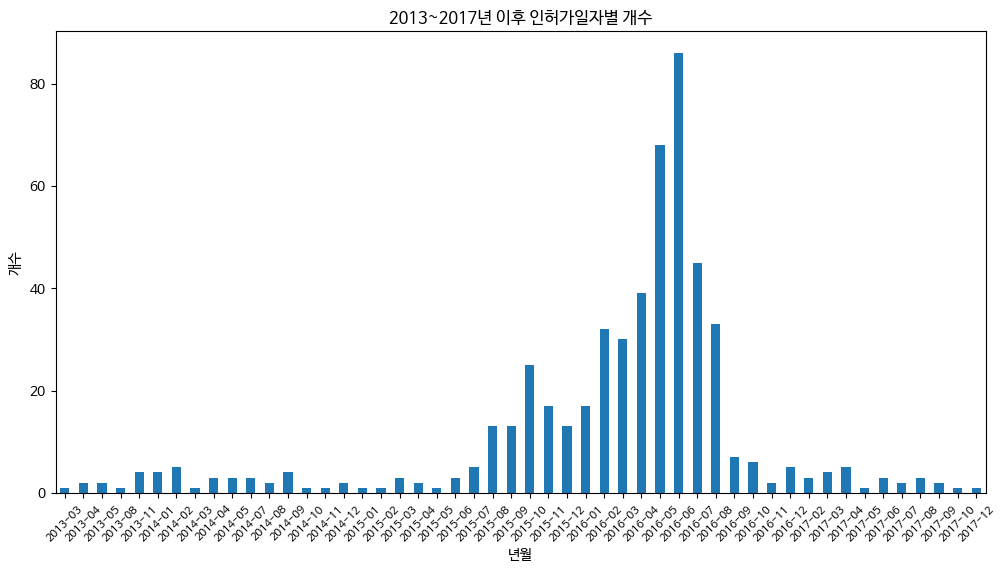

In [35]:
jc_df = df[df['사업장명'].str.contains('쥬씨', na=False)]
jc_df_1 = df_1[df_1['사업장명'].str.contains('쥬씨', na=False)]
merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
counts = merged_jc_df['년월'].value_counts().sort_index()

# 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

# 2013~2017년 데이터만 필터링
filtered_df = merged_jc_df[(merged_jc_df['인허가일자'].dt.year >= 2013) & (merged_jc_df['인허가일자'].dt.year <= 2017)]

# '년월'별로 개수 세기
counts = filtered_df['년월'].value_counts().sort_index()

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('2013~2017년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=45, fontsize=8)
plt.show()

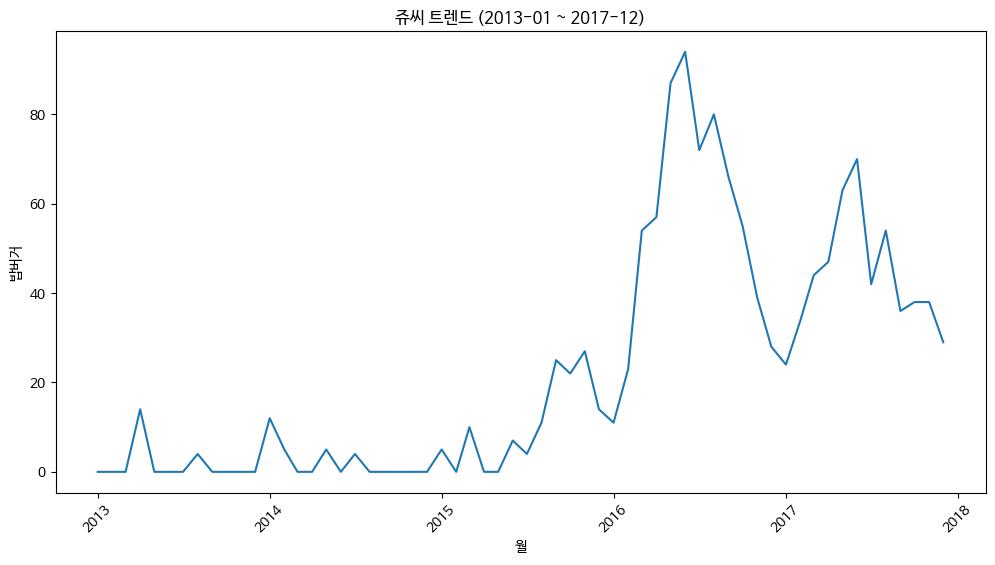

In [36]:
file_path = '/content/drive/MyDrive/[23-2] GCP/쥬씨_ggtrend.csv'  # CSV 파일 경로
trend_jc = pd.read_csv(file_path, encoding='cp949')

# '월' 컬럼을 datetime 형식으로 변환
trend_jc['월'] = pd.to_datetime(trend_jc['월'], format='%b-%y')

#데이터 필터링
start_date = pd.to_datetime('2013-01')
end_date = pd.to_datetime('2017-12')
filtered_trend_jc = trend_jc[(trend_jc['월'] >= start_date) & (trend_jc['월'] <= end_date)]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(filtered_trend_jc['월'], filtered_trend_jc['쥬씨'])
plt.title('쥬씨 트렌드 (2013-01 ~ 2017-12)')
plt.xlabel('월')
plt.ylabel('밥버거')
plt.xticks(rotation=45)
plt.show()

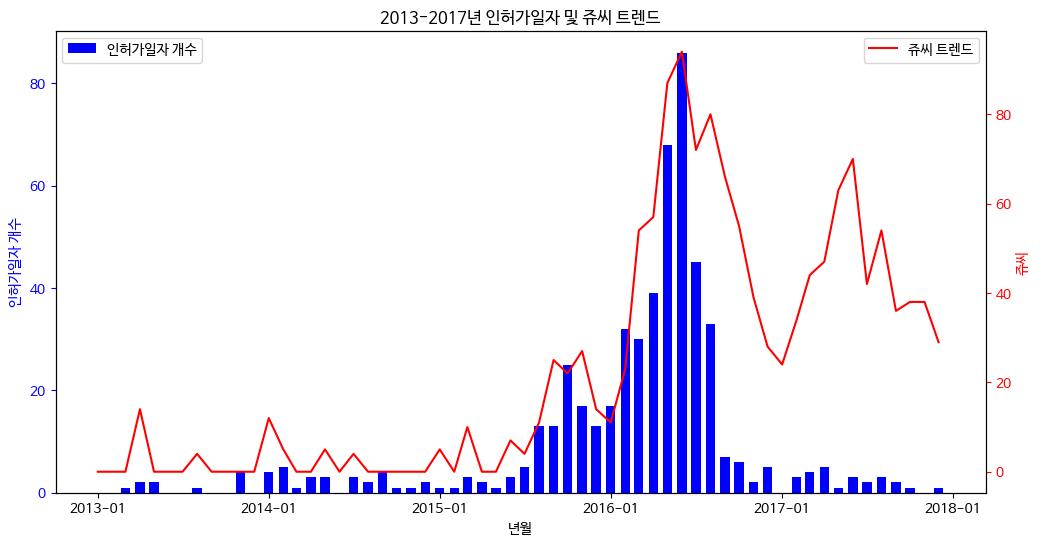

In [37]:
# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_jc['월'], filtered_trend_jc['쥬씨'], color='r', label='쥬씨 트렌드')
ax2.set_ylabel('쥬씨', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2013-2017년 인허가일자 및 쥬씨 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 카스테라 트렌드

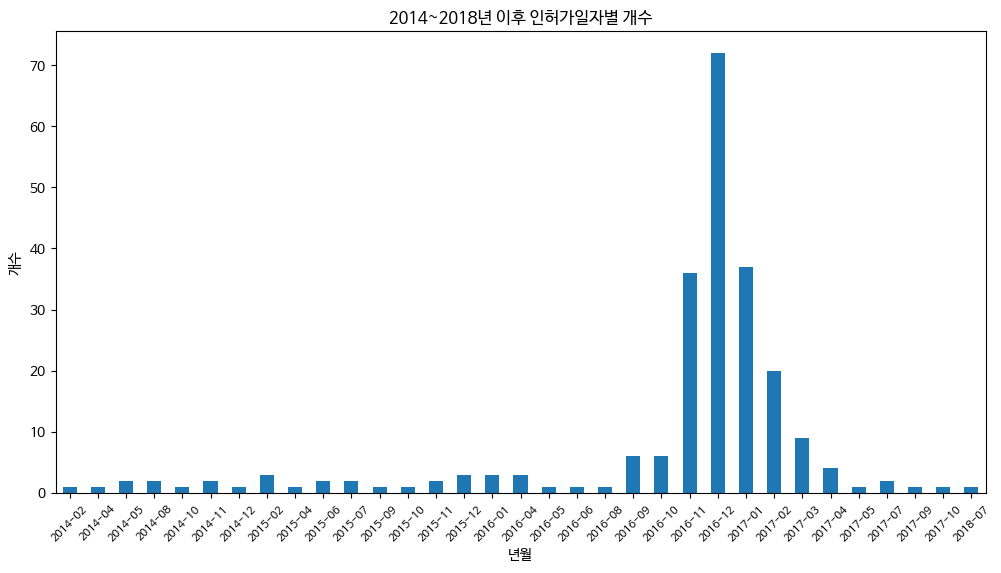

In [41]:
def make_counts_col(df, df_1, name='카스테라'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2013~2017년 데이터만 필터링
    filtered_df = merged_jc_df[(merged_jc_df['인허가일자'].dt.year >= 2014) & (merged_jc_df['인허가일자'].dt.year <= 2018)]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('2014~2018년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [42]:
def make_trend_df(file_path, start, end):
    trend_jc = pd.read_csv(file_path, encoding='cp949')

    # '월' 컬럼을 datetime 형식으로 변환
    trend_jc['월'] = pd.to_datetime(trend_jc['월'], format='%b-%y')

    #데이터 필터링
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    filtered_trend_jc = trend_jc[(trend_jc['월'] >= start_date) & (trend_jc['월'] <= end_date)]

    return filtered_trend_jc

file_path = '/content/drive/MyDrive/[23-2] GCP/카스테라_ggtrend.csv'  # CSV 파일 경로
filtered_trend_cs = make_trend_df(file_path, start='2014-01', end='2018-12')

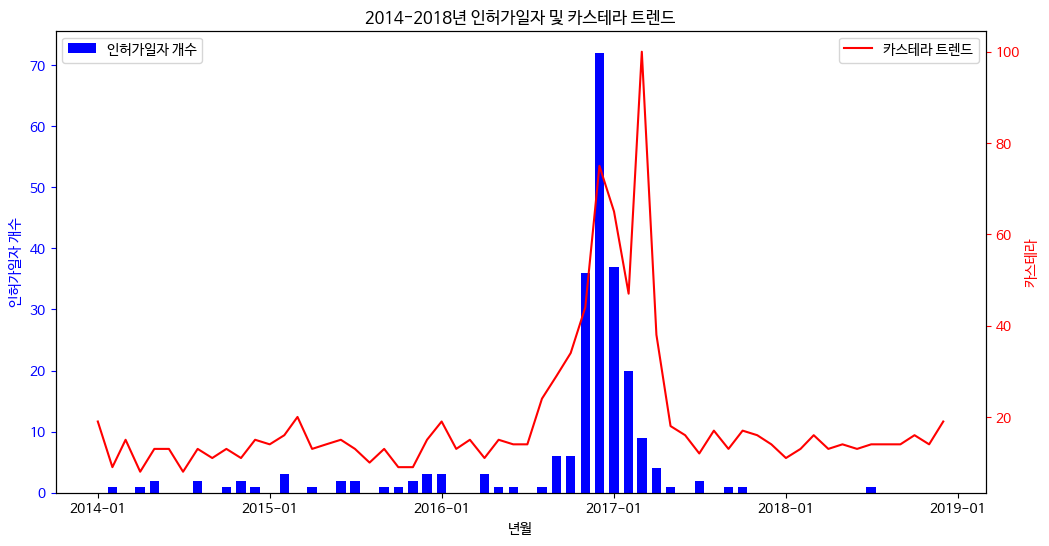

In [43]:
# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_cs['월'], filtered_trend_cs['카스테라'], color='r', label='카스테라 트렌드')
ax2.set_ylabel('카스테라', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2014-2018년 인허가일자 및 카스테라 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 마포갈매기 트렌드
- https://www.yna.co.kr/view/AKR20160309177600030
- 2008 출범 기준

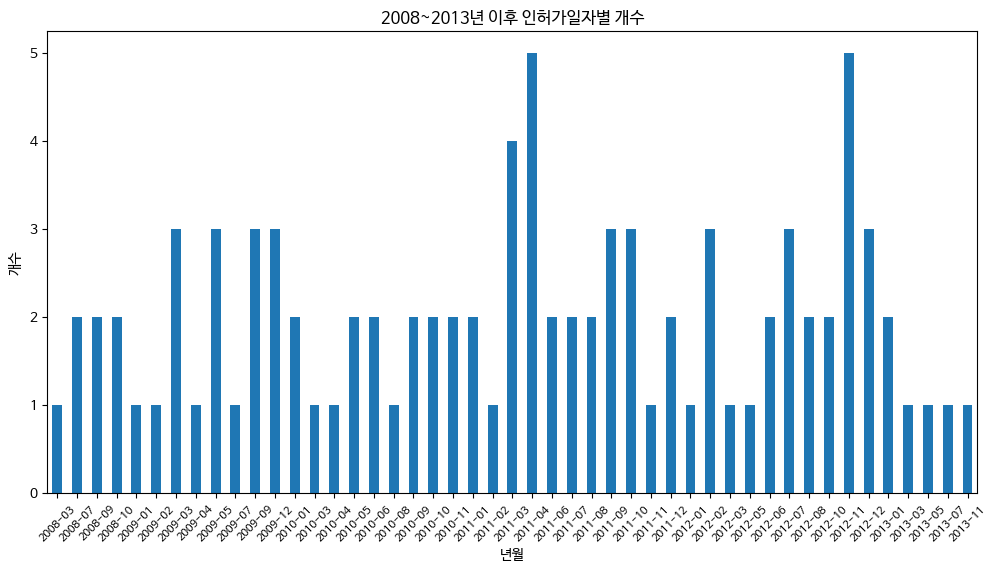

In [65]:
def make_counts_col(df, df_1, name='마포갈매기'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2008~2013년 데이터만 필터링
    filtered_df = merged_jc_df[(merged_jc_df['인허가일자'].dt.year >= 2008) & (merged_jc_df['인허가일자'].dt.year <= 2013)]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('2008~2013년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [66]:
file_path = '/content/drive/MyDrive/[23-2] GCP/마갈_ggtrend.csv'  # CSV 파일 경로
filtered_trend_mg = make_trend_df(file_path, start='2008-01', end='2013-12')

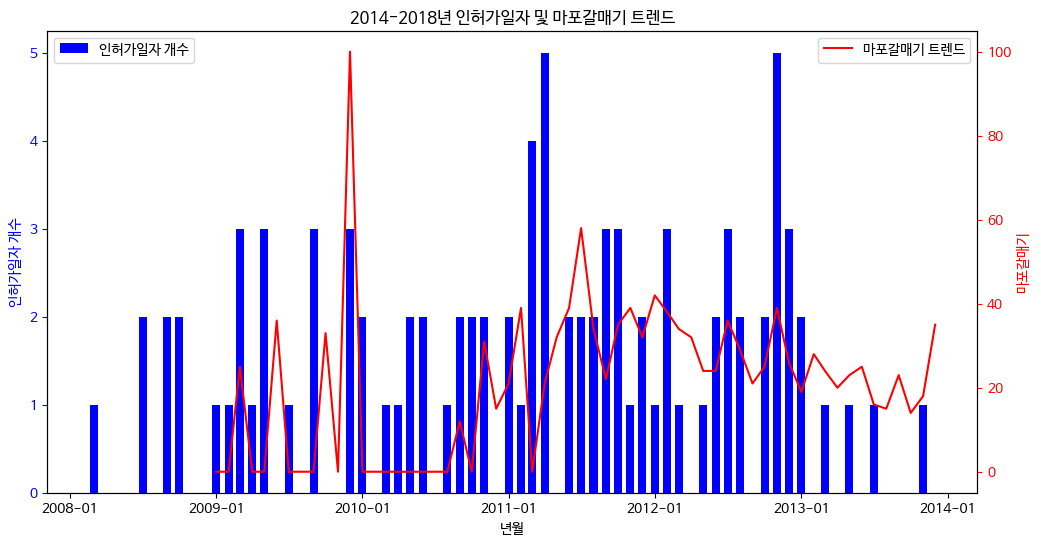

In [67]:
# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_mg['월'], filtered_trend_mg['마포갈매기'], color='r', label='마포갈매기 트렌드')
ax2.set_ylabel('마포갈매기', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2014-2018년 인허가일자 및 마포갈매기 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 엉터리생고기 트렌드

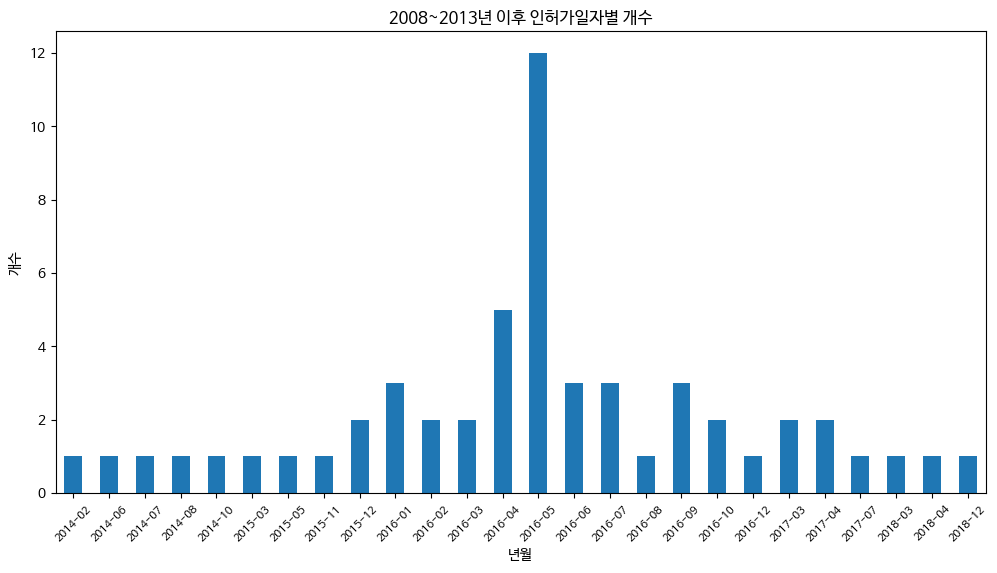

In [69]:
def make_counts_col(df, df_1, name='엉터리생고기'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2008~2013년 데이터만 필터링
    filtered_df = merged_jc_df[(merged_jc_df['인허가일자'].dt.year >= 2014) & (merged_jc_df['인허가일자'].dt.year <= 2018)]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('2008~2013년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=45, fontsize=8)
plt.show()

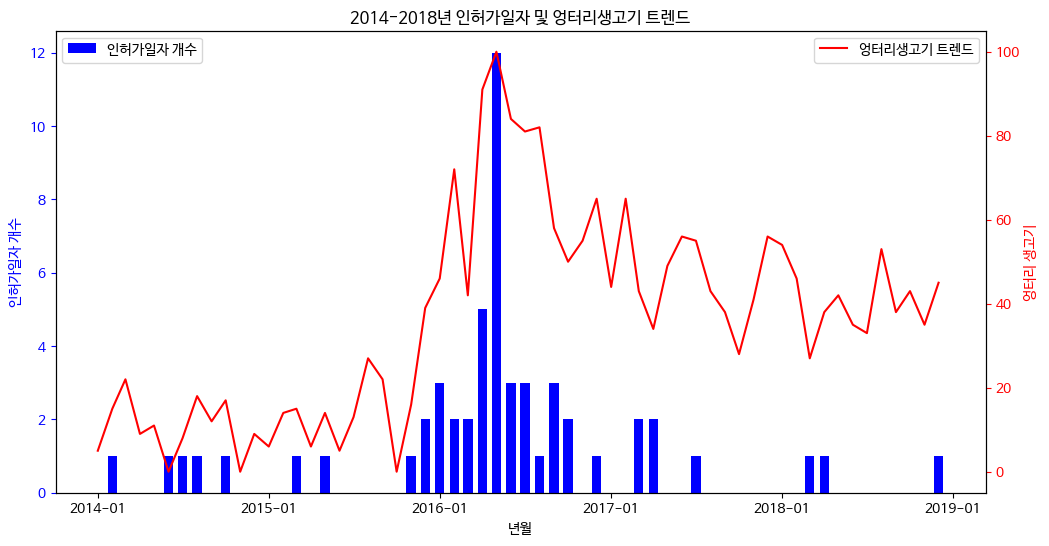

In [70]:
file_path = '/content/drive/MyDrive/[23-2] GCP/엉생_ggtrend.csv'  # CSV 파일 경로
filtered_trend_uu = make_trend_df(file_path, start='2014-01', end='2018-12')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_uu['월'], filtered_trend_uu['엉터리생고기'], color='r', label='엉터리생고기 트렌드')
ax2.set_ylabel('엉터리 생고기', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2014-2018년 인허가일자 및 엉터리생고기 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

# 스테디 아이템 분석

## 인허가일자 및 설빙 트렌드

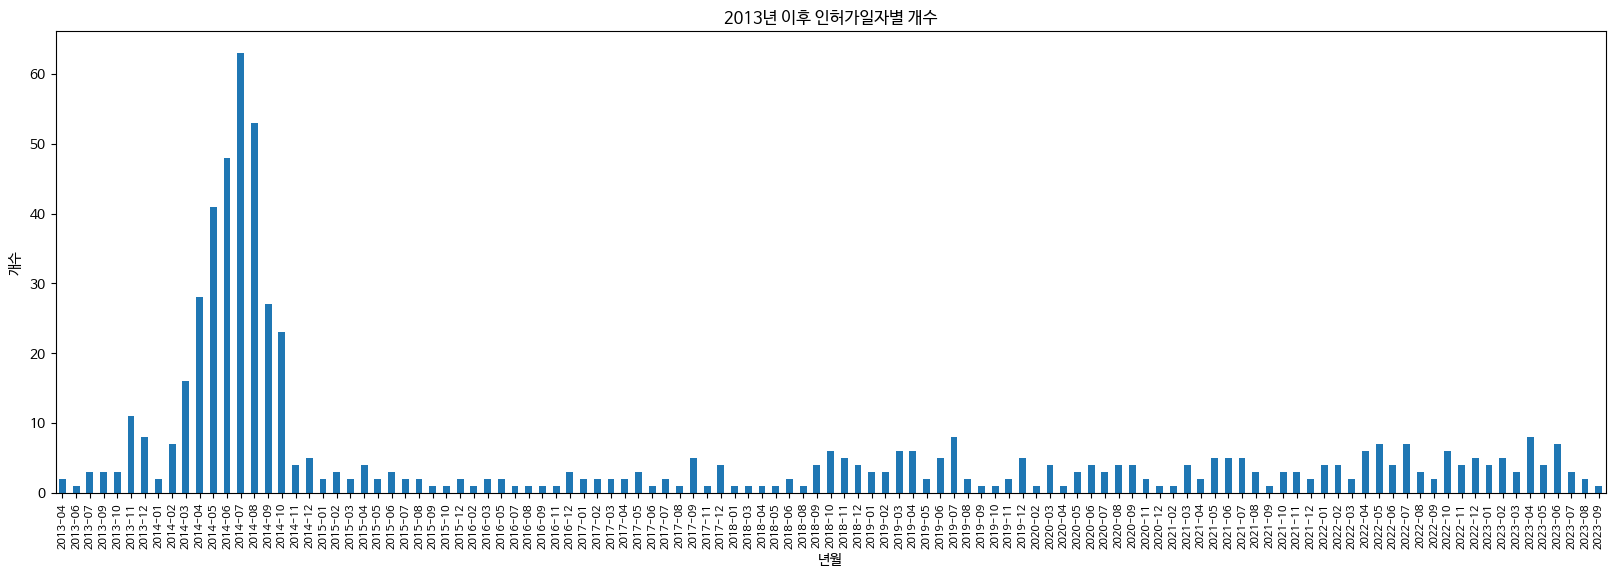

In [79]:
def make_counts_col(df, df_1, name='설빙'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2013년 이후 데이터만 필터링
    filtered_df = merged_jc_df[merged_jc_df['인허가일자'].dt.year >= 2013]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(20, 6))
counts.plot(kind='bar')
plt.title('2013년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=8)
plt.show()

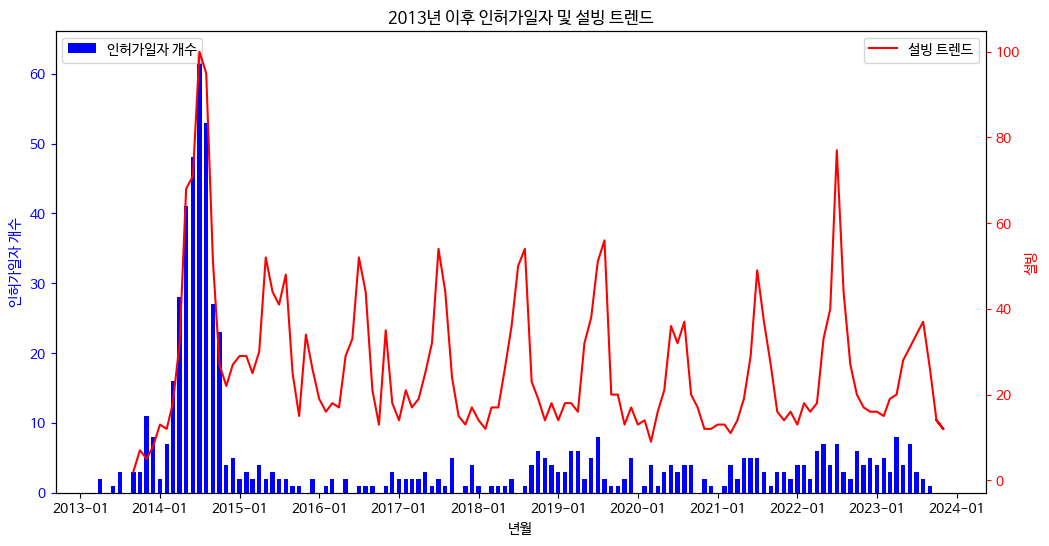

In [80]:
file_path = '/content/drive/MyDrive/[23-2] GCP/설빙_ggtrend.csv'  # CSV 파일 경로
filtered_trend_sb = make_trend_df(file_path, start='2013-01', end='2023-11')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_sb['월'], filtered_trend_sb['설빙'], color='r', label='설빙 트렌드')
ax2.set_ylabel('설빙', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2013년 이후 인허가일자 및 설빙 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 공차 트렌드

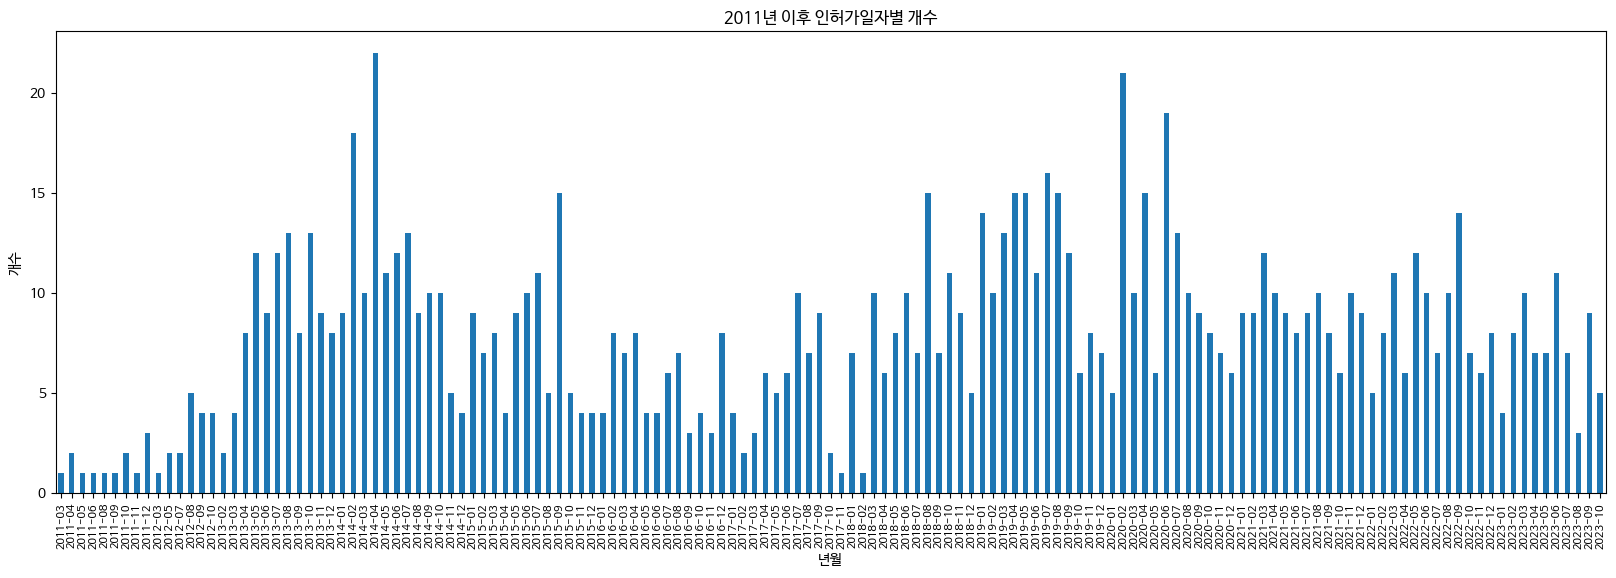

In [82]:
def make_counts_col(df, df_1, name='공차'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2011년 이후 데이터만 필터링
    filtered_df = merged_jc_df[merged_jc_df['인허가일자'].dt.year >= 2011]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(20, 6))
counts.plot(kind='bar')
plt.title('2011년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=8)
plt.show()

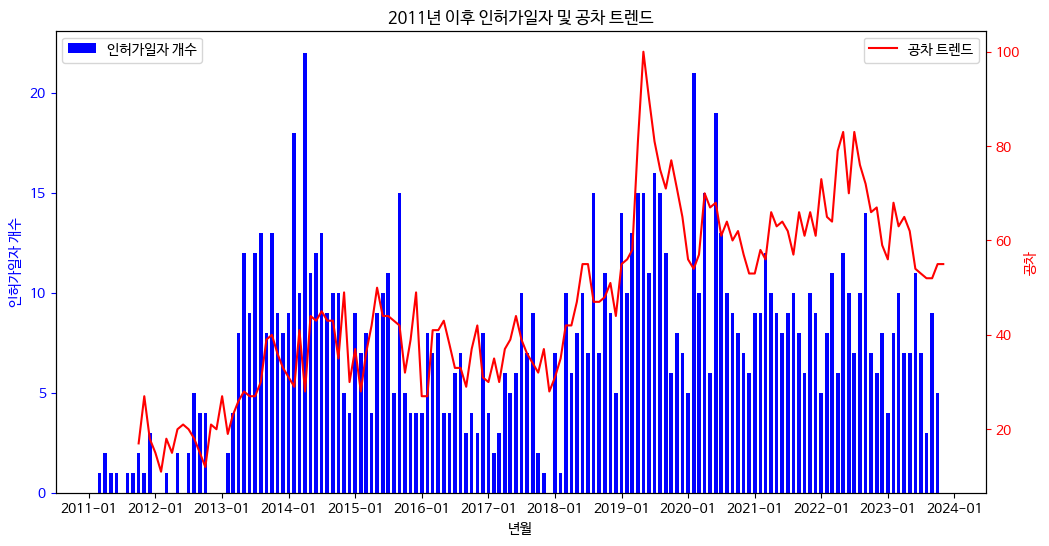

In [83]:
file_path = '/content/drive/MyDrive/[23-2] GCP/공차_ggtrend.csv'  # CSV 파일 경로
filtered_trend_gc = make_trend_df(file_path, start='2011-01', end='2023-11')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_gc['월'], filtered_trend_gc['공차'], color='r', label='공차 트렌드')
ax2.set_ylabel('공차', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2011년 이후 인허가일자 및 공차 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 핫도그(명랑 핫도그) 트렌드

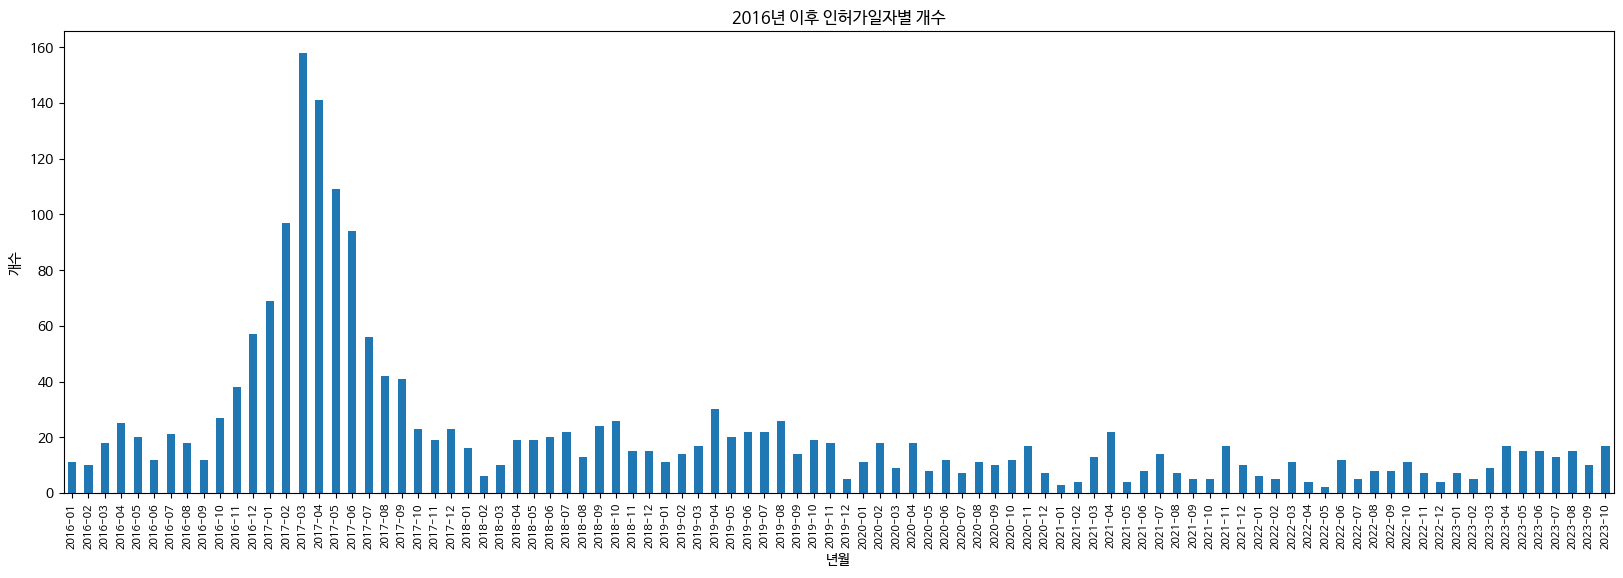

In [84]:
def make_counts_col(df, df_1, name='핫도그'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2011년 이후 데이터만 필터링
    filtered_df = merged_jc_df[merged_jc_df['인허가일자'].dt.year >= 2016]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(20, 6))
counts.plot(kind='bar')
plt.title('2016년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=8)
plt.show()

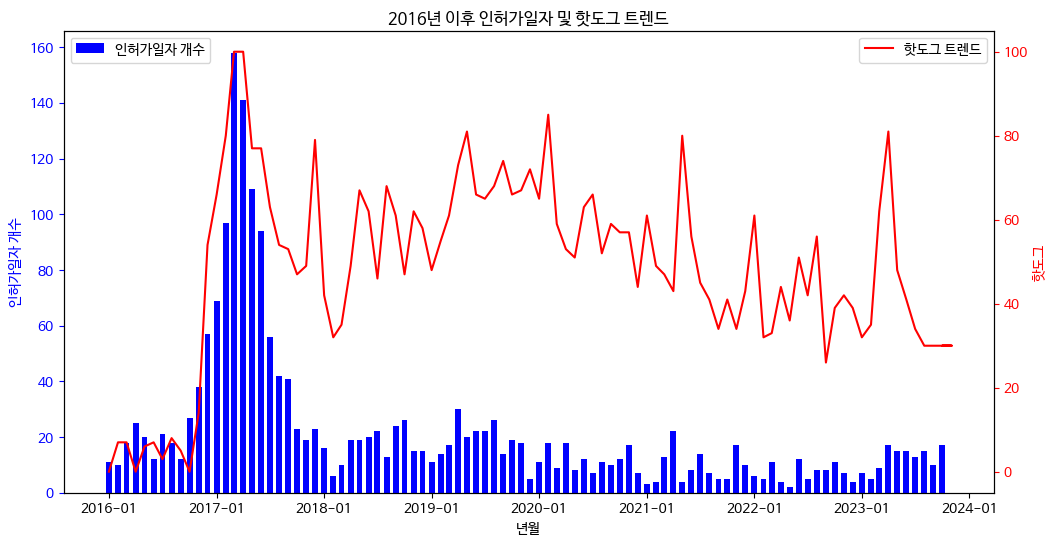

In [87]:
file_path = '/content/drive/MyDrive/[23-2] GCP/핫도그_ggtrend.csv'  # CSV 파일 경로
filtered_trend_hd = make_trend_df(file_path, start='2016-01', end='2023-11')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_hd['월'], filtered_trend_hd['핫도그'], color='r', label='핫도그 트렌드')
ax2.set_ylabel('핫도그', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2016년 이후 인허가일자 및 핫도그 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 엽떡 트렌드

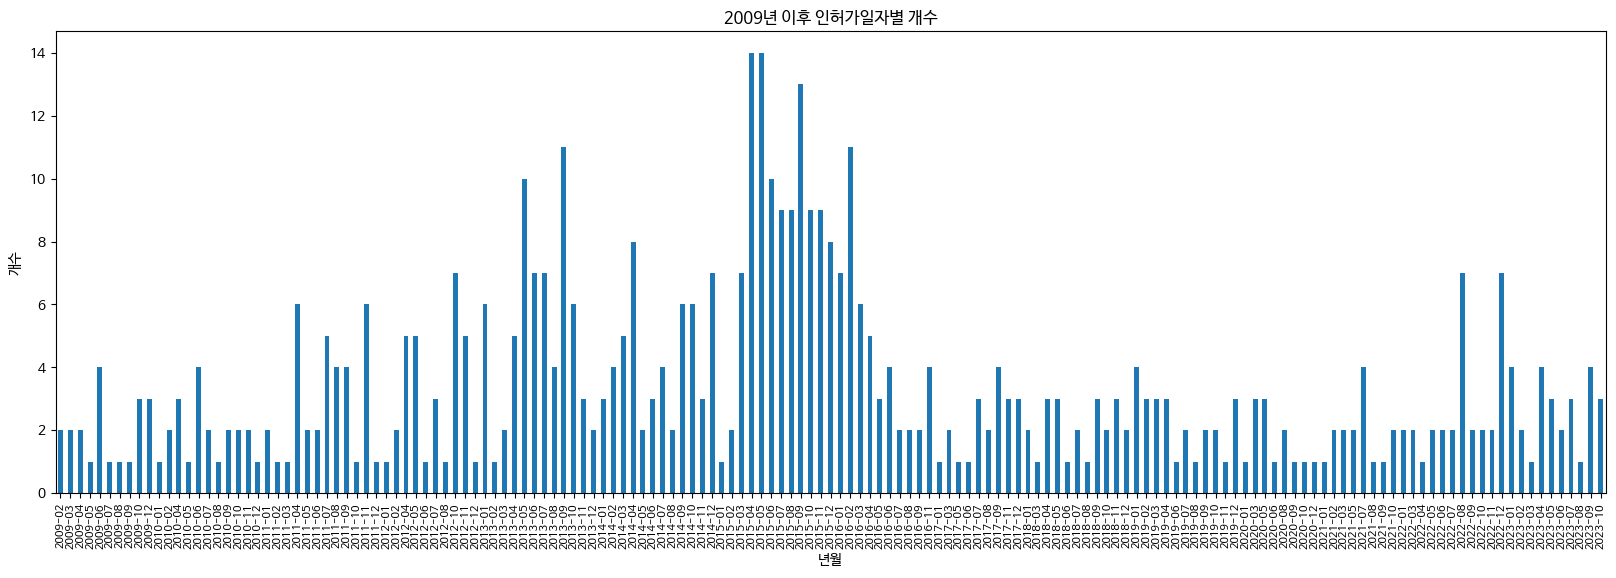

In [89]:
def make_counts_col(df, df_1, name='엽기떡볶이'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2011년 이후 데이터만 필터링
    filtered_df = merged_jc_df[merged_jc_df['인허가일자'].dt.year >= 2009]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(20, 6))
counts.plot(kind='bar')
plt.title('2009년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=8)
plt.show()

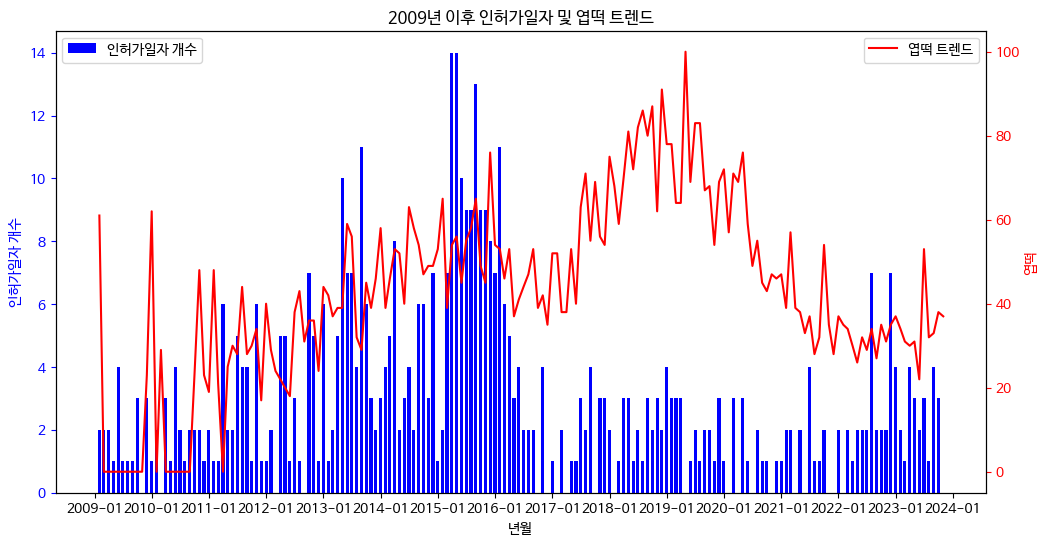

In [91]:
file_path = '/content/drive/MyDrive/[23-2] GCP/엽떡_ggtrend.csv'  # CSV 파일 경로
filtered_trend_tt = make_trend_df(file_path, start='2009-02', end='2023-11')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_tt['월'], filtered_trend_tt['엽떡'], color='r', label='엽떡 트렌드')
ax2.set_ylabel('엽떡', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2009년 이후 인허가일자 및 엽떡 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

## 인허가일자 및 마라탕 트렌드

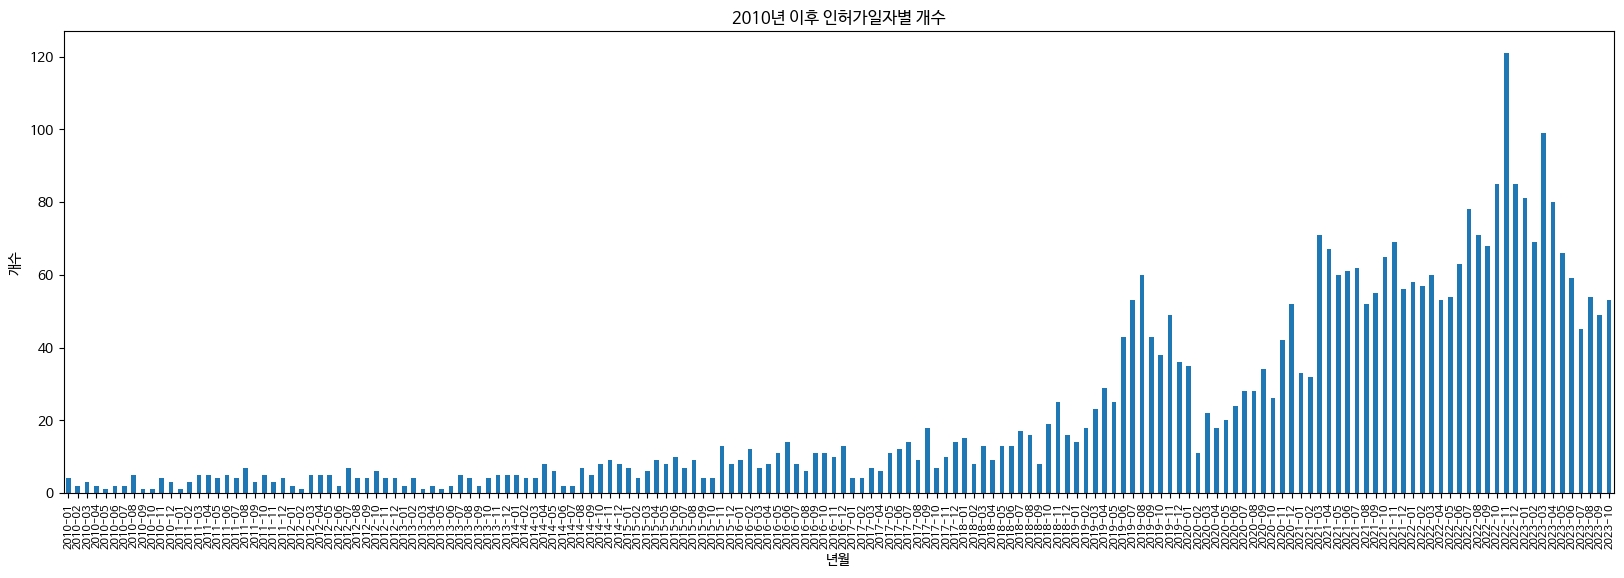

In [99]:
def make_counts_col(df, df_1, name='마라탕'):
    jc_df = df[df['사업장명'].str.contains(name, na=False)]
    jc_df_1 = df_1[df_1['사업장명'].str.contains(name, na=False)]
    merged_jc_df = pd.concat([jc_df, jc_df_1], axis=0)

    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')
    counts = merged_jc_df['년월'].value_counts().sort_index()

    # 가정: df는 '인허가일자' 컬럼을 포함한 데이터프레임
    merged_jc_df['인허가일자'] = pd.to_datetime(merged_jc_df['인허가일자'])
    merged_jc_df['년월'] = merged_jc_df['인허가일자'].dt.to_period('M')

    # 2015년 이후 데이터만 필터링
    filtered_df = merged_jc_df[merged_jc_df['인허가일자'].dt.year >= 2010]

    # '년월'별로 개수 세기
    #counts = merged_jc_df['년월'].value_counts().sort_index()
    counts = filtered_df['년월'].value_counts().sort_index()

    return counts

counts = make_counts_col(df, df_1)

# 그래프 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 설정

# 그래프 그리기
plt.figure(figsize=(20, 6))
counts.plot(kind='bar')
plt.title('2010년 이후 인허가일자별 개수')
plt.xlabel('년월')
plt.ylabel('개수')
plt.xticks(rotation=90, fontsize=8)
plt.show()

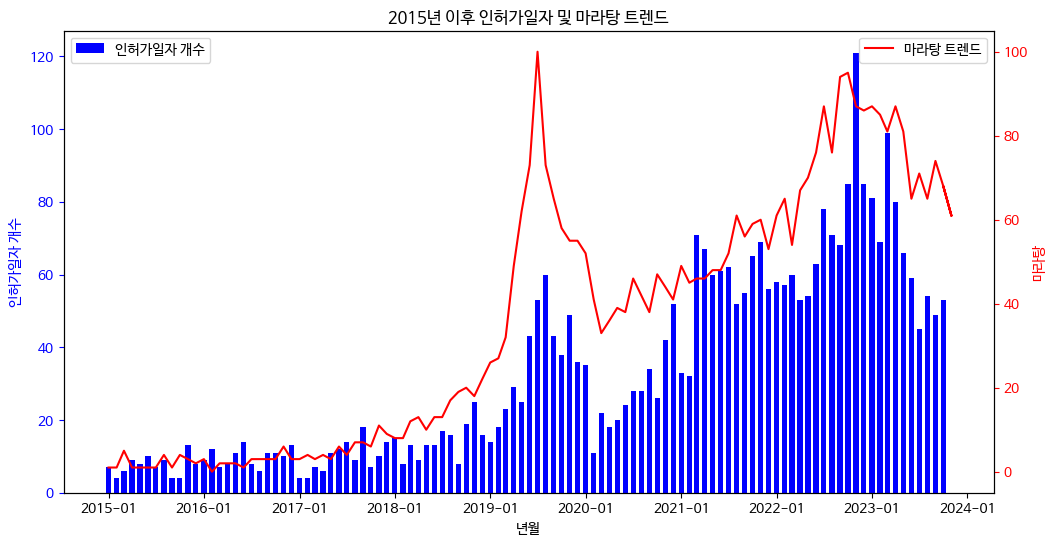

In [96]:
file_path = '/content/drive/MyDrive/[23-2] GCP/마라탕_ggtrend.csv'  # CSV 파일 경로
filtered_trend_mt = make_trend_df(file_path, start='2015-01', end='2023-11')

# 첫 번째 그래프 설정 ('인허가일자' 기반)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(counts.index.to_timestamp(), counts, color='b', width=20, label='인허가일자 개수')
ax1.set_xlabel('년월')
ax1.set_ylabel('인허가일자 개수', color='b')
ax1.tick_params('y', colors='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 두 번째 그래프 설정 ('월' 기반)
ax2 = ax1.twinx()
ax2.plot(filtered_trend_mt['월'], filtered_trend_mt['마라탕'], color='r', label='마라탕 트렌드')
ax2.set_ylabel('마라탕', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 레이블 설정
plt.title('2015년 이후 인허가일자 및 마라탕 트렌드')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()